In [287]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install tabulate

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [288]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import pandas as pd
import math
from tabulate import tabulate

In [289]:
feraction = 0 #it should be between 0 and 1
codes = [Path.MOVETO] + [Path.LINETO] * 2 + [Path.CLOSEPOLY]
vertices = [(3, 3), (7, 3), (7, 7), (0, 0)]
path = Path(vertices, codes)

In [290]:
def change_color(path, xCoordinates, yCoordinates, feraction=0):
    colors = ["red" for x in xCoordinates]
    probability = np.random.rand(len(xCoordinates))
    for p in range(len(xCoordinates)):
        if path.contains_points([(xCoordinates[p], yCoordinates[p])])[0]:
            colors[p] = "blue"
        if probability[p] < feraction:
            if colors[p] == "red":
                colors[p] = "blue"
            else:
                colors[p] = "red"
    return colors

In [291]:
def generate_points(nOfPoints):
    xCoordinates = np.random.rand(nOfPoints) * 10
    yCoordinates = np.random.rand(nOfPoints) * 10
    colors = change_color(path, xCoordinates, yCoordinates, feraction)
    df = pd.DataFrame({"x":xCoordinates, "y":yCoordinates, "color":colors}, columns=["x","y","color"])
    return df

In [292]:
def find_KNN(df, point, k):
    df['dist'] = np.sqrt((df['x'].to_numpy() - point['x'])**2 + (df['y'].to_numpy() - point['y'])**2)
    df.sort_values('dist', ignore_index=True, inplace=True)
    return df[:k]

In [293]:
def experiement_1(n):
    k = 5
    areaOfCircles = 20
    df = generate_points(n)
    fig, axs = plt.subplots(1, 1, figsize = (10, 10), tight_layout = True)
    pathpatch = PathPatch(path, facecolor = 'none', edgecolor = 'green')
    axs.add_patch(pathpatch)
    plt.scatter(df["x"], df["y"], s = areaOfCircles, c = df["color"], alpha = 0.5)
    axs.autoscale_view()
    plt.show()

    # uncomment out this line for debbuging
    # misRates = [x for x in range(20)]

    # comment out this for debbuging
    misRates = []
    for i in range(20):
        testNumber = 10000
        testPoints = generate_points(testNumber)

        nOfTrueColors = 0

        for index, row in testPoints.iterrows():
            knnColor = find_KNN(df, row, k)['color'].mode()[0]
            if knnColor == row['color']:
                nOfTrueColors += 1
        misRate = round(((testNumber - nOfTrueColors) / testNumber) * 100, 2)
        misRates.append(misRate)

    return [n, [min(misRates), max(misRates)], np.average(misRates), np.std(misRates)]
    

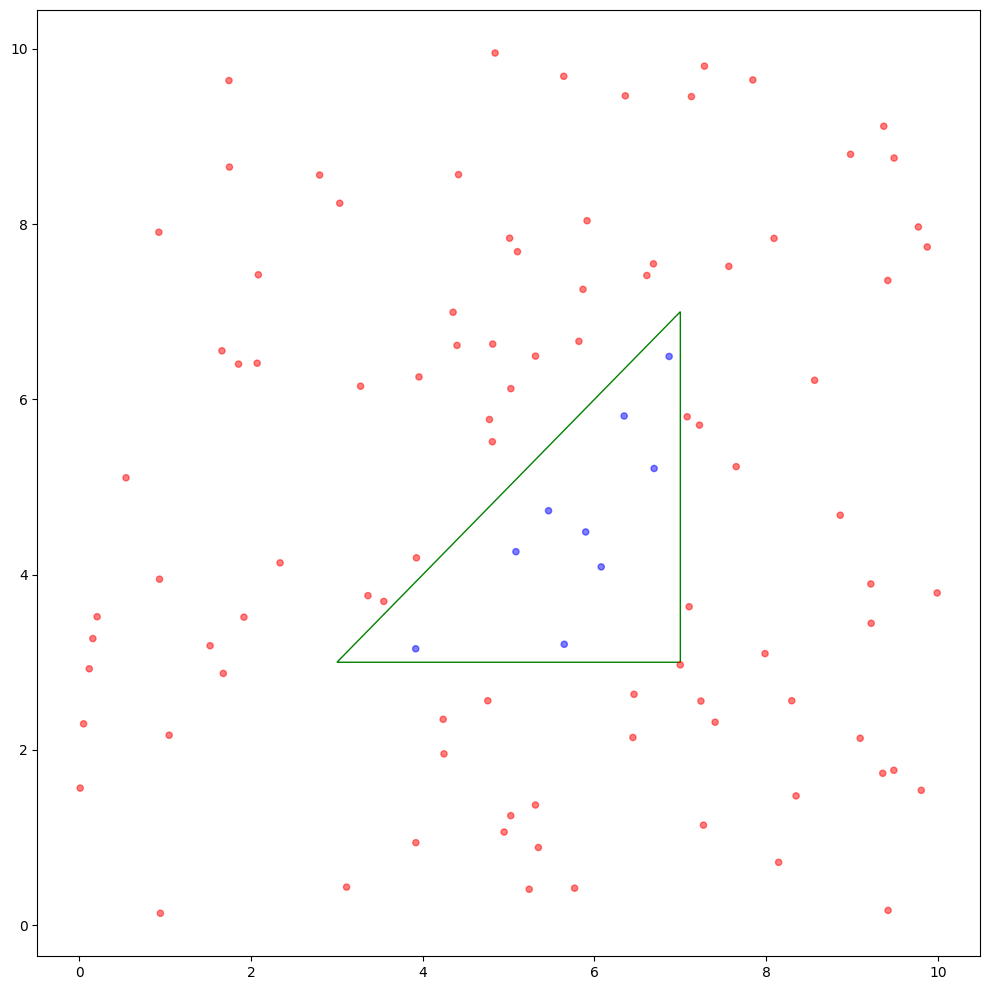

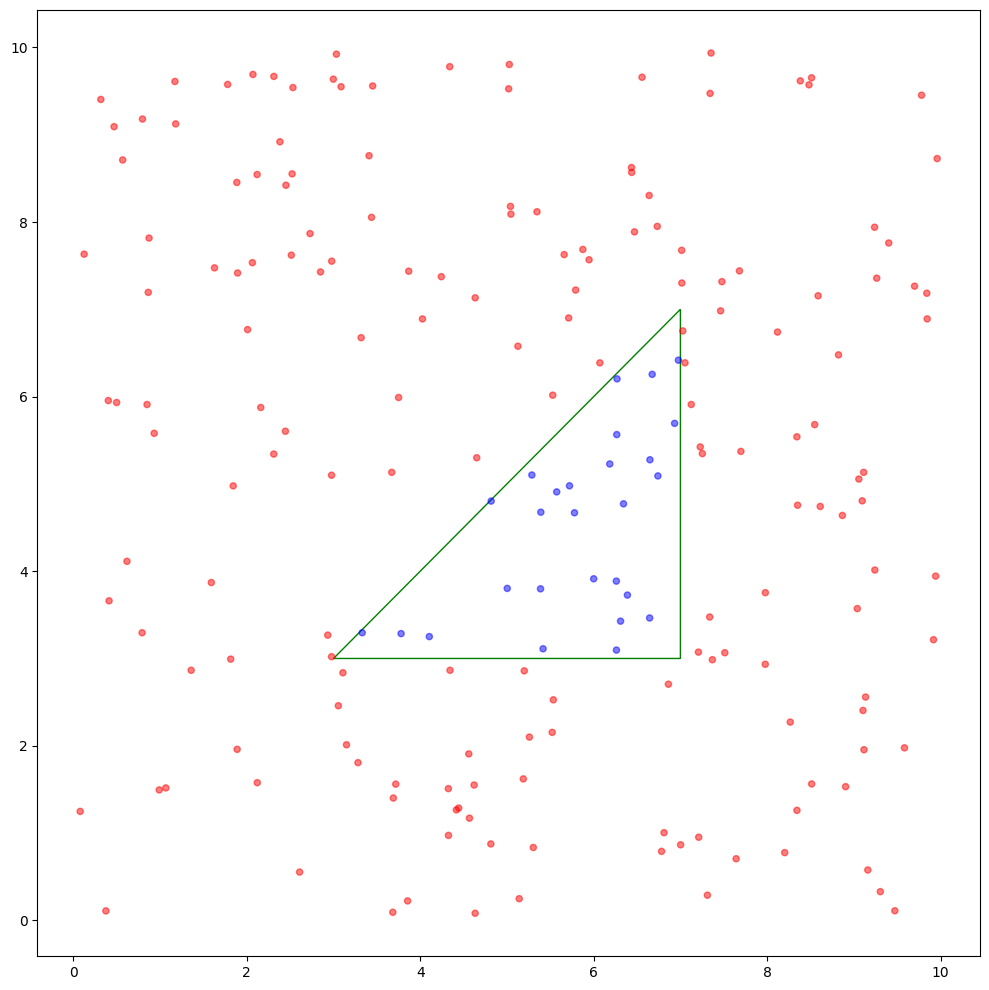

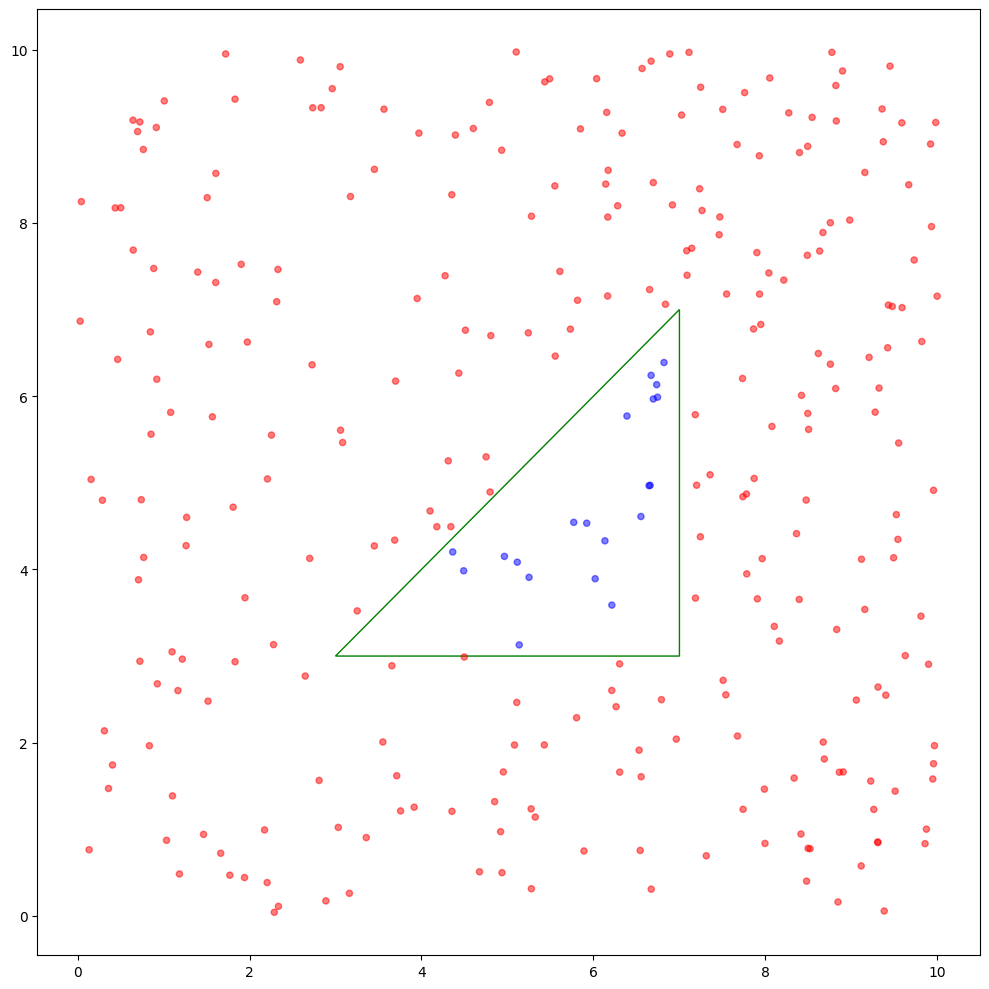

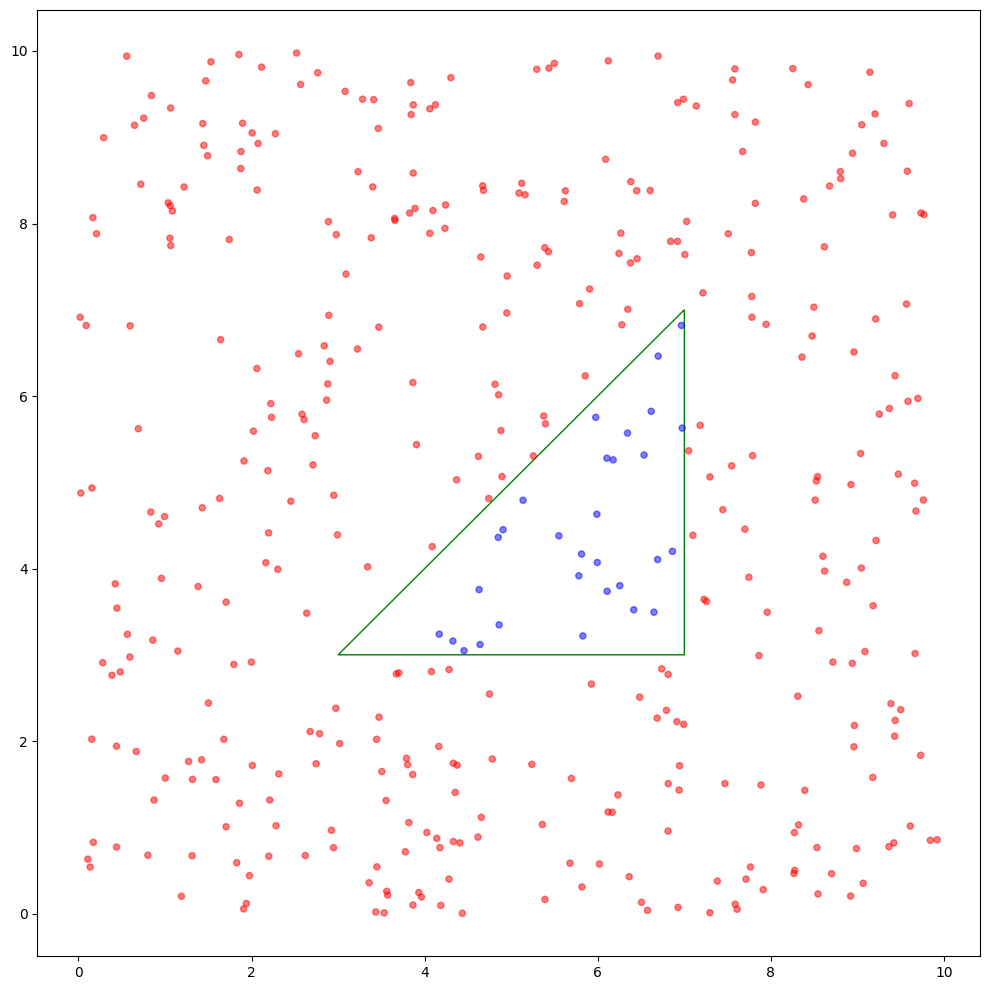

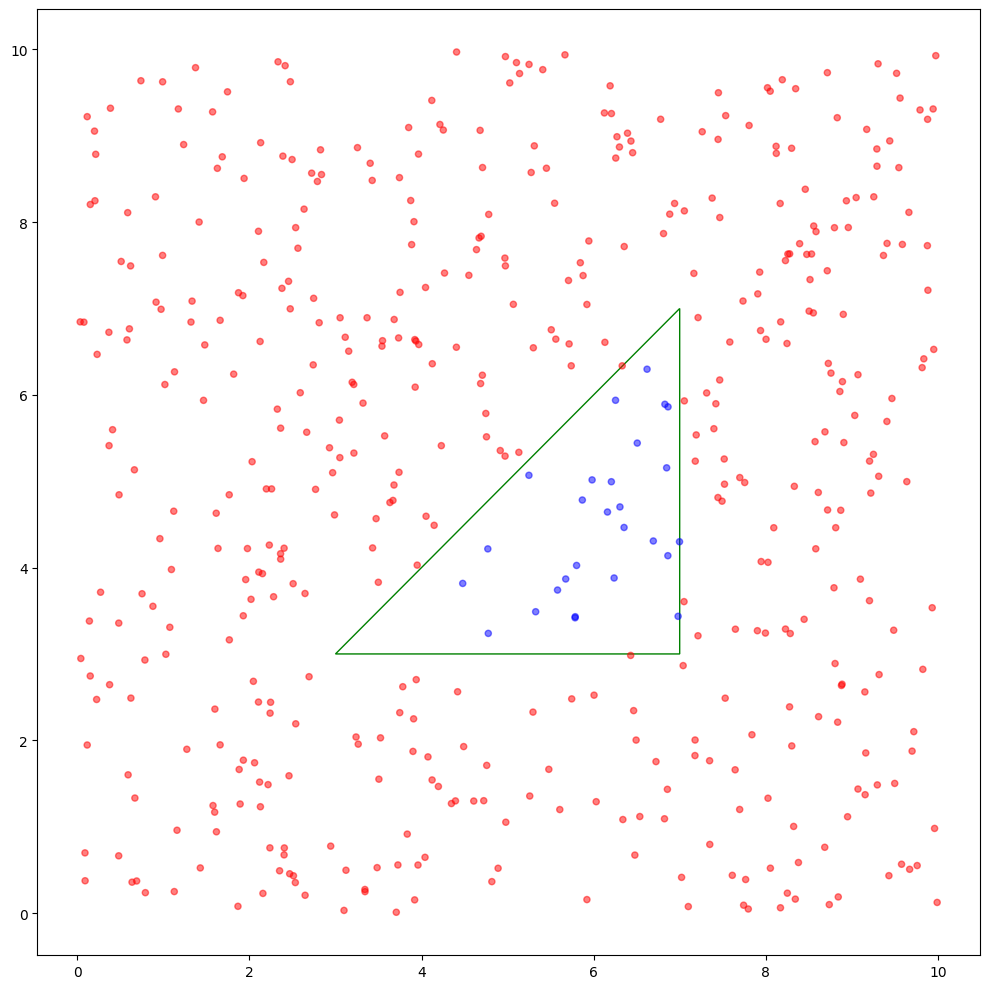

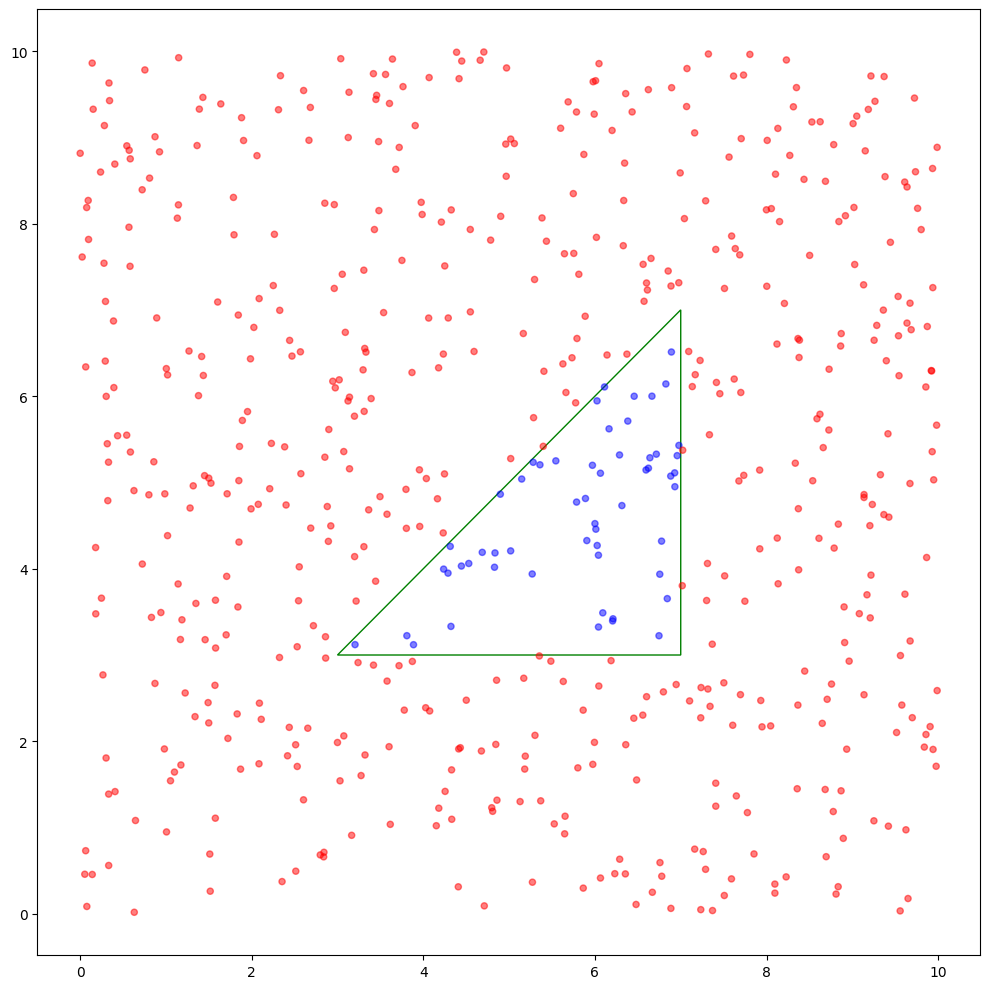

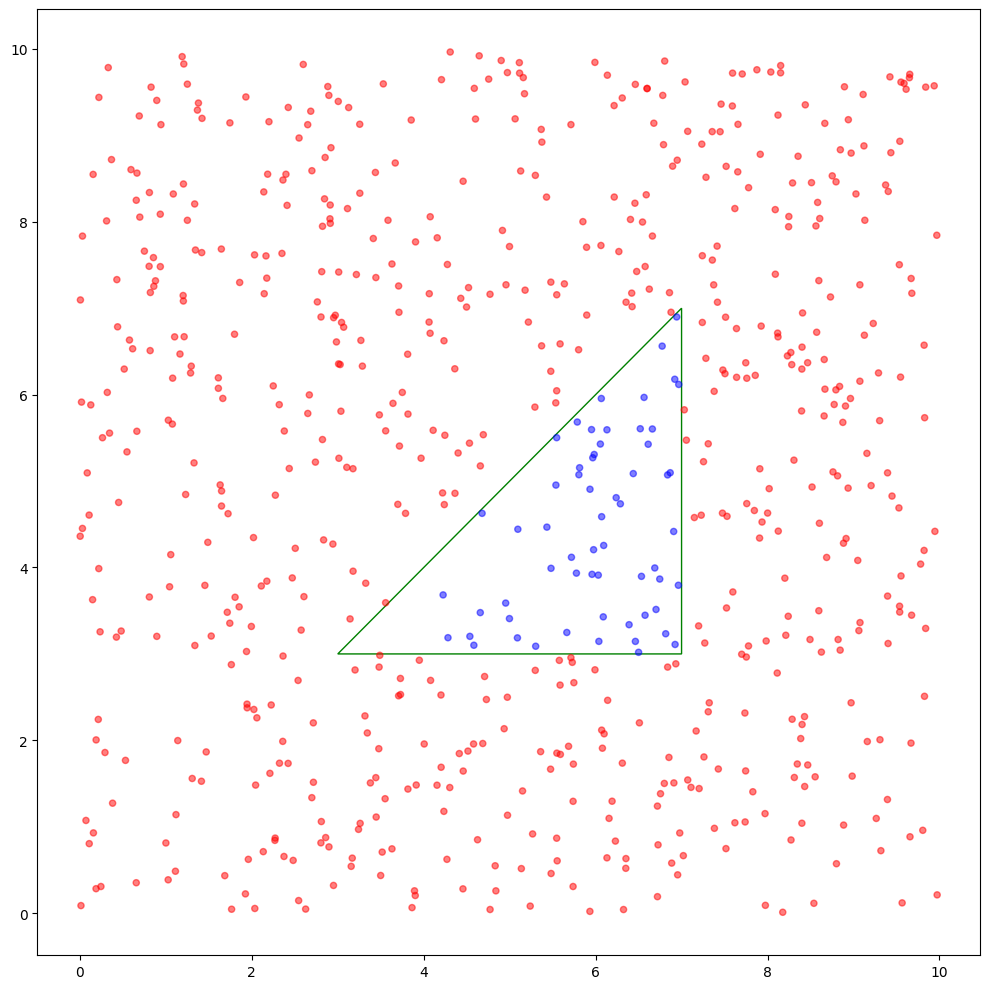

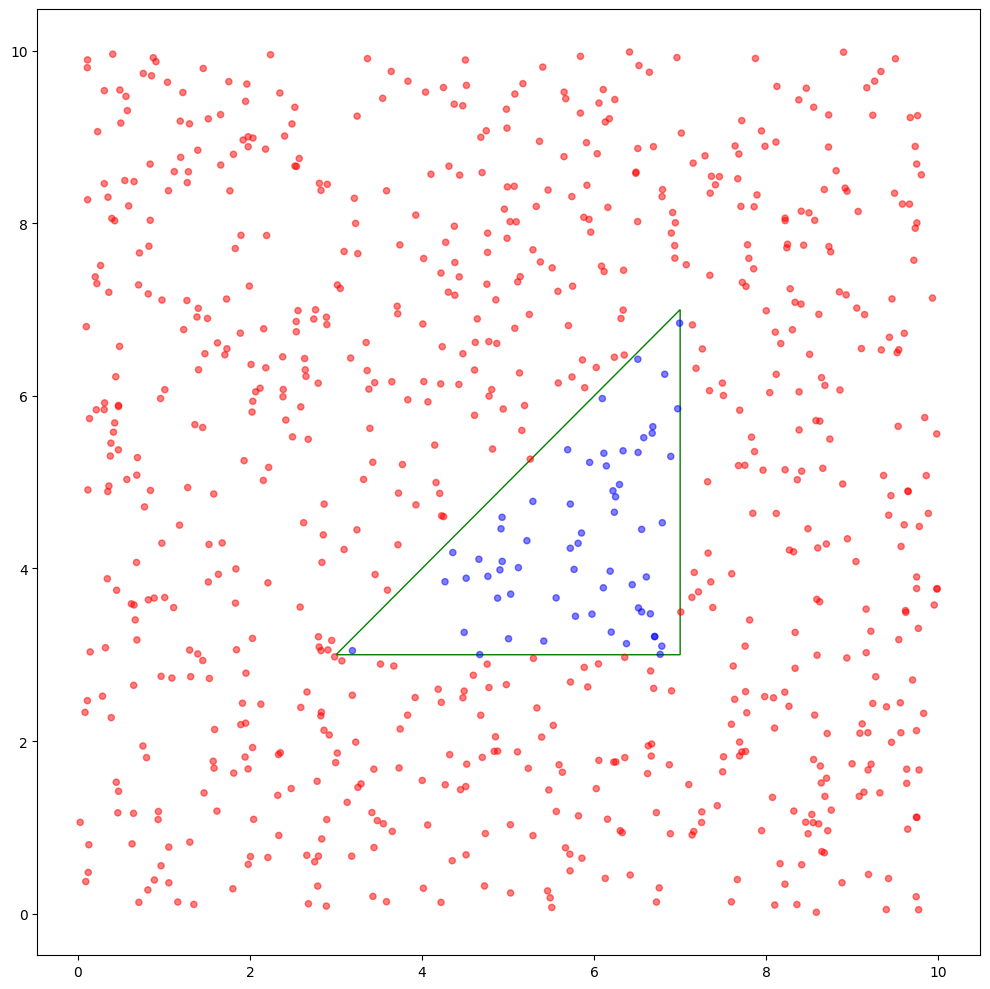

 Number of points   Min/max misclassified count     Average of 20 repeats    Standard deviation of 20 repeats
------------------  -----------------------------  -----------------------  ----------------------------------
       100          [0, 19]                                 9.50                           5.77
       200          [0, 19]                                 9.50                           5.77
       300          [0, 19]                                 9.50                           5.77
       400          [0, 19]                                 9.50                           5.77
       500          [0, 19]                                 9.50                           5.77
       600          [0, 19]                                 9.50                           5.77
       700          [0, 19]                                 9.50                           5.77
       800          [0, 19]                                 9.50                           5.77


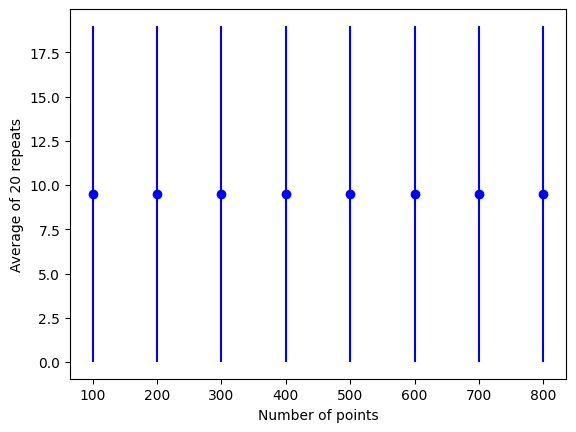

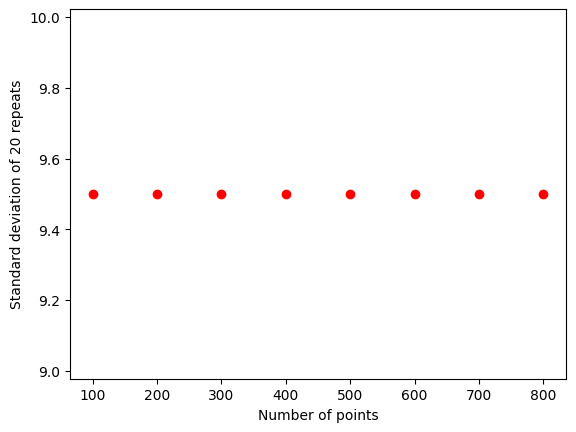

In [294]:
table = [experiement_1(100), experiement_1(200), experiement_1(300), experiement_1(400), experiement_1(500), 
experiement_1(600), experiement_1(700), experiement_1(800)]


print(tabulate(
    table, 
    headers = [
        'Number of points', 
        'Min/max misclassified count',
        'Average of 20 repeats', 'Standard deviation of 20 repeats'], 
    numalign = "center", floatfmt=".2f"))

# graph for average
plt.errorbar(
    [x[0] for x in table], 
    [x[2] for x in table], 
    yerr=[[x[2] - x[1][0] for x in table], [x[1][1] - x[2] for x in table]], 
    fmt=('bo'))
plt.ylabel('Average of 20 repeats')
plt.xlabel('Number of points')
plt.show()

# graph for sta
plt.plot([x[0] for x in table], [x[2] for x in table], 'ro')
plt.ylabel('Standard deviation of 20 repeats')
plt.xlabel('Number of points')
plt.show()